In [189]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
import scipy.io as io
import time

from scipy.interpolate import CubicSpline

plt.rc("font", family=["Times New Roman"]) #skifter skrifttype
plt.rc("axes", labelsize=18)   #skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=16, direction="out")  #skriftstørrelse af ticks og viser ticks øverst
plt.rc("ytick", labelsize=16, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=16)

In [190]:
def plaw(wl, T, unit) : 
    c = 299792458 # m/s
    h = 6.62607015e-34 # J*s
    kB = 1.380649e-23 # J/K
    #A = p[0]
    #T = p[1] # K
    factor = 1
    if unit == True : 
        factor=1e-9
    return (2*h*c**2)/((wl*factor)**5)*1/(np.exp((h*c)/((wl*factor)*kB*T))-1)

def wien(l_max) : 
    b = 2.9*1e-3 # m K
    return b/l_max

def getdata(path) :
    data = np.genfromtxt(d1, skip_header=1)
    wl = []
    i = []
    for ar in data : 
        wl.append(ar[0])
        i.append(ar[1])
    return (wl, i)

def lines(ax, wlist, ilist, wavelength) : 
    nwlist = []
    nilist = []
    for i, v in enumerate(wlist) : 
        if(v >= (wavelength-2) and v <= (wavelength+2)) : 
            nwlist.append(v)
            nilist.append(ilist[i])
            
    return ax.fill_between(nwlist, nilist, color='midnightblue', alpha=0.2)

d1 = r"../Spectrum of sun/Sun1.txt"
d2 = "r../Spectrum of sun/Sun2.txt"

5668.845588465268
15


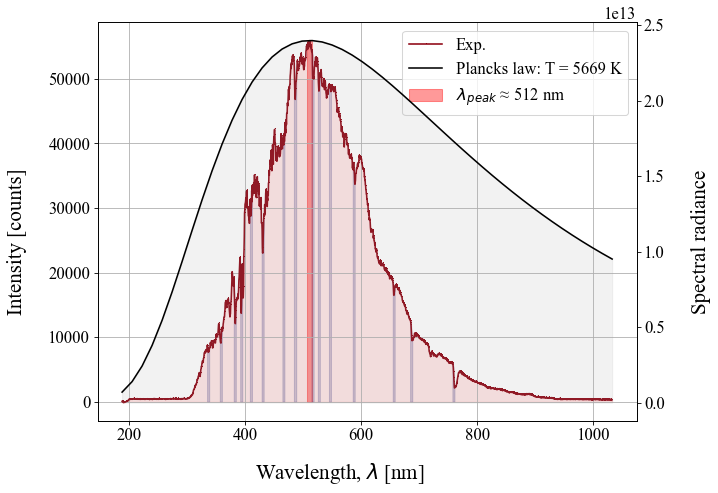

In [191]:
fig, ax = plt.subplots(figsize=(8,6), dpi=75)
fig.tight_layout()

wavel, intensity = getdata(d1)

index = np.argmax(intensity)
lambdamax = wavel[index]
intensitymax = intensity[index]

ax.plot(wavel, intensity, marker=',', color='#8c000f', label='Exp.')

xborder = wavel[index-10:index+10]

ax.fill_between( wavel, intensity, color='r', alpha=0.1)

ax.fill_between(xborder, y1 = [0]*len(xborder), y2 = [intensitymax]*len(xborder), 
                color='r', alpha=0.4, label='$\lambda_{peak}$ ≈ 512 nm')

T = wien(l[index])

ax2 = ax.twinx()
lT = np.linspace(np.min(wavel), np.max(wavel))
iT = plaw(lT, T, unit=True)
ax2.plot(lT, iT, color='k', linestyle='-')
ax2.fill_between(lT, iT, color='darkgrey', alpha=0.15)

print(T)

flines = [336, 358, 382, 393, 410, 430, 466, 486, 516, 527, 546, 587, 656, 686, 759]
print(len(flines))

for w in flines : 
    lines(ax, wavel, intensity, w)

ax.plot(200,200, 'k-', label = 'Plancks law: T = 5669 K')

lprop = [20, 5]

ax.xaxis.set_label_coords(0.45,-0.1)
ax.yaxis.set_label_coords(-0.13, 0.45)

ax.set_xlabel("Wavelength, $\lambda$ [nm]", size=lprop[0])
ax.set_ylabel("Intensity [counts]", size=lprop[0])
ax2.set_ylabel("Spectral radiance", size=lprop[0])

ax.xaxis.set_label_coords(0.45,-0.1)
ax.yaxis.set_label_coords(-0.13, 0.45)
ax2.yaxis.set_label_coords(1.1, 0.45)

ax.grid()
ax.legend()


#fig.savefig("Solar spectrum.svg", format='svg', bbox_inches="tight")




In [192]:
l1, i1 = getdata(d2)
l2, i2 = getdata(r"../Spectrum of sun/data1.txt")

nl2 = []
for index, i in enumerate(i1) : 
    nl2.append(i-i2[index])

nl = list(map(lambda x, y: x-y, i1, i2))

print(i1[0], i2[0])


53.25 53.25
